# NEXT with Walength OpticaL Fibers (NEXT-WOLF)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
from IPython.display import Image 
from IPython.display import Math
from IPython.display import Latex

In [3]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jan 28 19:31:17 2020


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import tables            as tb
import random
import glob
import warnings
#sns.set()

In [5]:
from pynext.system_of_units import *

In [6]:
from pynext.pynext_types import TpcEL
from pynext.pynext_types import TpcXe
from pynext.pynext_types import Cylinder, Sphere, Ray
from pynext.pynext_types import FiberWLS
from pynext.pynext_types import WLS
from pynext.pynext_types import SiPM
from pynext.pynext_types import FiberDetector

In [42]:
from pynext.graphics import draw_cylinder
from pynext.pynext_plot import  display_figure
from pynext.pynext_plot import  display_figures

In [85]:
from pynext.histograms import  h1, h1d

# Modelling the detector. 

## EL properties

In [8]:
tpcel = TpcEL(EP = 1.2 * kilovolt / (cm * bar),
               dV = 0.5 * kilovolt / cm,
               P  =  15 * bar,
               d  =  10 * mm,
               L  = 125 * cm)
tpcel


        E/P =    1.20 kV * cm^-1* bar^-1
        dV = drift voltage =    0.50 kV * cm^-1
        P  = pressure =   15.00 bar
        d  = EL grid gap =   10.00 mm
        L  = drift lenght =   1.25 m
        Grid voltage =   18.00 kV
        Cathode voltage =   80.50 kV
        Yield =  7.80e+02 photons/e

    
        Primary scintillation photons per MeV = 2.55e+04
        Primary ionization electrons per MeV = 4.57e+04
        EL photons per MeV                   = 3.56e+07
        
        Primary scintillation Krypton = 1.06e+03
        Primary ionization electrons Krypton = 1.89e+03
        EL photons Krypton                   = 1.48e+06
        
        Primary scintillation Qbb = 6.27e+04
        Primary ionization electrons Qbb = 1.12e+05
        EL photons Qbb                   = 8.75e+07
        

## HD is a cylinder of 2.5 m diameter and 2.5 length 

In [9]:
r    = 125 * cm
zmin = -125 * cm
zmax = 125 * cm
chd =Cylinder(r, zmin, zmax)
chd

Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)

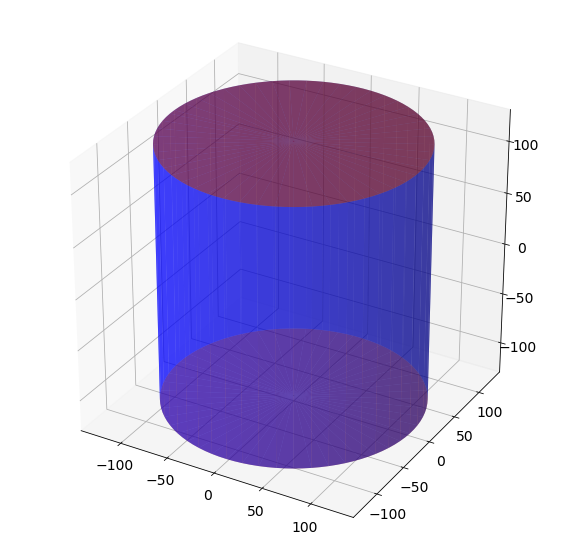

In [10]:
draw_cylinder(chd, units=cm, alpha=0.5, figsize=(10,10))

In [11]:
hdxe = TpcXe(chd)
hdxe


        material       = Xenon
        density (rho)  =    0.09 g/cm3
        mass           = 1103.24  kg
        Cylinder       = Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)
    

## Optical Fiber detector

In [12]:
tpb = WLS(name='TPB', qeff=0.65)
tpb

WLS(name='TPB', qeff=0.65)

In [13]:
fwls = FiberWLS(d = 2*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)
fwls


        diameter =2.0 mm, Q = 0.85, PTFE refl = 0.98
        ncore = 1.6, nclad1 =1.49, nclad2 =1.42
        Absoprtion prob at 450 nm     = 0.8906170225195483
        Trapping efficieny            = 0.09837038590604039
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [14]:
s13360 = SiPM(name='s13360', xsize=2*mm, PDE = 0.4, C = 150*pF, Rs=100*ohm)
s13360


        sensor =s13360, size = 2.0 mm, PDE = 0.4
        capacitance = 150.00 pF;
        

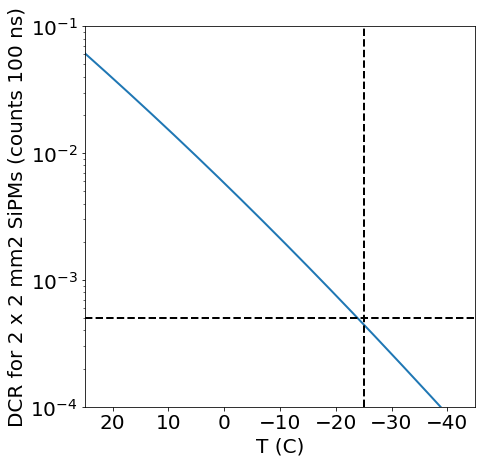

In [50]:
T = np.arange(25, -105, -1)
display_figure(T, s13360.dcr_sipm_per_time(T, 100 * ns) ,'T (C)', 'DCR for 2 x 2 mm2 SiPMs (counts 100 ns)', 
               xlim=[25,-45], ylim=[1e-4,1e-1], log='logy', xl = -25, yl=5e-4, lw=2, figsize=(7,7) )

In [54]:
fdHD = FiberDetector(tpcel, hdxe, fwls, s13360, eff_t=0.84, sampling= 100 * ns, adcPerPes=15, tempC=-25)
fdHD


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      = 1103.24  kg

        Dimensions(Cylinder)  = Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)

        Fibers efficiency = 3.76 %
        of which: Transport = 0.053710230704698055 % & attenuation = 0.6996725373751304 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 3927

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.48e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 8.75e+07

        Primary scintillation Krypton detected = 1.59e+01
        EL photons Krypton detected            = 2.22e+04
        Primary scintillation Qbb detected     = 9.43e+02
        EL photons Qbb detected                = 1.32e+06

        Pr

In [59]:
fdHD = FiberDetector(tpcel, hdxe, fwls, s13360, eff_t=0.8, sampling= 100 * ns, adcPerPes=15, tempC=-15)
fdHD


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      = 1103.24  kg

        Dimensions(Cylinder)  = Cylinder(r=1250.0, zmin=-1250.0, zmax=1250.0)

        Fibers efficiency = 3.58 %
        of which: Transport = 0.051152600671141 % & attenuation = 0.6996725373751304 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 3927

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.48e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 8.75e+07

        Primary scintillation Krypton detected = 1.52e+01
        EL photons Krypton detected            = 2.12e+04
        Primary scintillation Qbb detected     = 8.98e+02
        EL photons Qbb detected                = 1.25e+06

        Prima

## NEXT-100 with fibers

In [60]:
r    = 50 * cm
zmin = -55 * cm
zmax = 55 * cm
cn100 =Cylinder(r, zmin, zmax)
cn100

Cylinder(r=500.0, zmin=-550.0, zmax=550.0)

In [26]:
n100xe = TpcXe(cn100)
n100xe


        material       = Xenon
        density (rho)  =    0.09 g/cm3
        mass           =   77.67  kg
        Cylinder       = Cylinder(r=500.0, zmin=-550.0, zmax=550.0)
    

In [61]:
fdn100 = FiberDetector(tpcel, n100xe, fwls, s13360, eff_t=0.8, sampling= 100 * ns, adcPerPes=15,tempC=-25)
fdn100


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      =   77.67  kg

        Dimensions(Cylinder)  = Cylinder(r=500.0, zmin=-550.0, zmax=550.0)

        Fibers efficiency = 4.37 %
        of which: Transport = 0.051152600671141 % & attenuation = 0.8545819669589086 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 1571

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.48e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 8.75e+07

        Primary scintillation Krypton detected = 1.85e+01
        EL photons Krypton detected            = 2.58e+04
        Primary scintillation Qbb detected     = 1.10e+03
        EL photons Qbb detected                = 1.53e+06

        Primary 

## NEW with fibers

In [62]:
r    = 25 * cm
zmin = -25 * cm
zmax = 25 * cm
cnew =Cylinder(r, zmin, zmax)
cnew

Cylinder(r=250.0, zmin=-250.0, zmax=250.0)

In [63]:
newxe = TpcXe(cnew)
newxe


        material       = Xenon
        density (rho)  =    0.09 g/cm3
        mass           =    8.83  kg
        Cylinder       = Cylinder(r=250.0, zmin=-250.0, zmax=250.0)
    

In [64]:
fdnew = FiberDetector(tpcel, newxe, fwls, s13360, eff_t=0.8, sampling= 100 * ns, adcPerPes=15, tempC=-25)
fdnew


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      =    8.83  kg

        Dimensions(Cylinder)  = Cylinder(r=250.0, zmin=-250.0, zmax=250.0)

        Fibers efficiency = 4.76 %
        of which: Transport = 0.051152600671141 % & attenuation = 0.9310627797040227 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 786

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.48e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 8.75e+07

        Primary scintillation Krypton detected = 2.02e+01
        EL photons Krypton detected            = 2.82e+04
        Primary scintillation Qbb detected     = 1.19e+03
        EL photons Qbb detected                = 1.67e+06

        Primary s

## DEMO with fibers

In [65]:
r    = 15 * cm
zmin = -15 * cm
zmax = 15 * cm
cdemo =Cylinder(r, zmin, zmax)
cdemo

Cylinder(r=150.0, zmin=-150.0, zmax=150.0)

In [66]:
demoxe = TpcXe(cdemo)
demoxe


        material       = Xenon
        density (rho)  =    0.09 g/cm3
        mass           =    1.91  kg
        Cylinder       = Cylinder(r=150.0, zmin=-150.0, zmax=150.0)
    

In [67]:
fdemo = FiberDetector(tpcel, demoxe, fwls, s13360, eff_t=0.8, sampling= 100 * ns, adcPerPes=15, tempC=-25)
fdemo


        gas pressure  =   15.00 bar
        gas density   =    0.09 g/cm3
        gas mass      =    1.91  kg

        Dimensions(Cylinder)  = Cylinder(r=150.0, zmin=-150.0, zmax=150.0)

        Fibers efficiency = 4.90 %
        of which: Transport = 0.051152600671141 % & attenuation = 0.9580482443263975 %
        SiPM PDE          = 0.40
        SiPM size         = 2.00 mm
        fiber size        = 2.00 mm
        Sampling S1       = 100.00 ns
        ADC counts 1 PE   = 15
        number of fibers  = 472

        Primary scintillation Krypton          = 1.06e+03
        EL photons Krypton                     = 1.48e+06
        Primary scintillation Qbb              = 6.27e+04
        EL photons Qbb                         = 8.75e+07

        Primary scintillation Krypton detected = 2.08e+01
        EL photons Krypton detected            = 2.90e+04
        Primary scintillation Qbb detected     = 1.23e+03
        EL photons Qbb detected                = 1.72e+06

        Primary s